In [2]:
import json
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import defaultdict
import textwrap

In [3]:
results = defaultdict(dict)
for path in Path("../reports/").glob("*.json"):
    with open(path, "r") as f:
        model_name = path.stem.split("+")[0].replace("--", "/")
        dataset_name = path.stem.split("+")[1]
        results[dataset_name][model_name] = json.load(f)
data = []
for dataset, r in results.items():
    for model, result in r.items():
        data.append(
            {
                "dataset": dataset,
                "model": model,
                "weighted_f1": result["weighted avg"]["f1-score"],
                "macro_f1": result["macro avg"]["f1-score"],
            }
        )
data = pd.DataFrame(data)

In [46]:
def wrap_labels(ax, width, rotation, break_long_words=True):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        wrapped_text = textwrap.fill(
            text, width=width, break_long_words=break_long_words
        )
        labels.append(wrapped_text)
    ax.set_xticklabels(labels, rotation=rotation)

In [54]:
def barplot(dataset, metric):
    # create an ax
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(
        data=data[data.dataset == dataset].sort_values(metric, ascending=True),
        x="model",
        y=metric,
        ax=ax,
    )
    # add values above bars formatted as percentage with 2 decimal places
    for p in ax.patches:
        ax.annotate(
            f"{p.get_height()*100:.2f}%",
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="center",
            fontsize=11,
            color="gray",
            rotation=0,
            xytext=(0, 20),
            textcoords="offset points",
        )
    wrap_labels(ax, 20, 45)
    ax.set_ylim(0, 1)
    return ax

<Axes: xlabel='model', ylabel='macro_f1'>

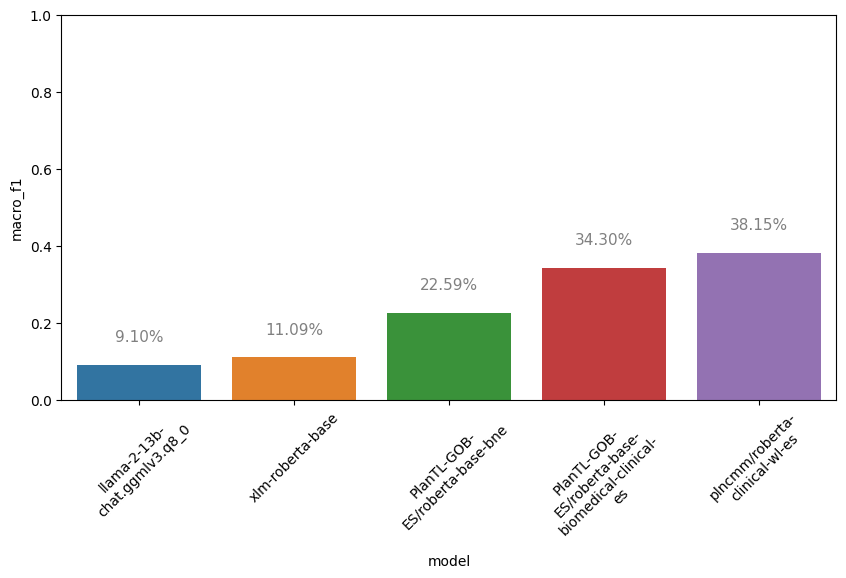

In [56]:
barplot(dataset="wl", metric="macro_f1")

<Axes: xlabel='model', ylabel='macro_f1'>

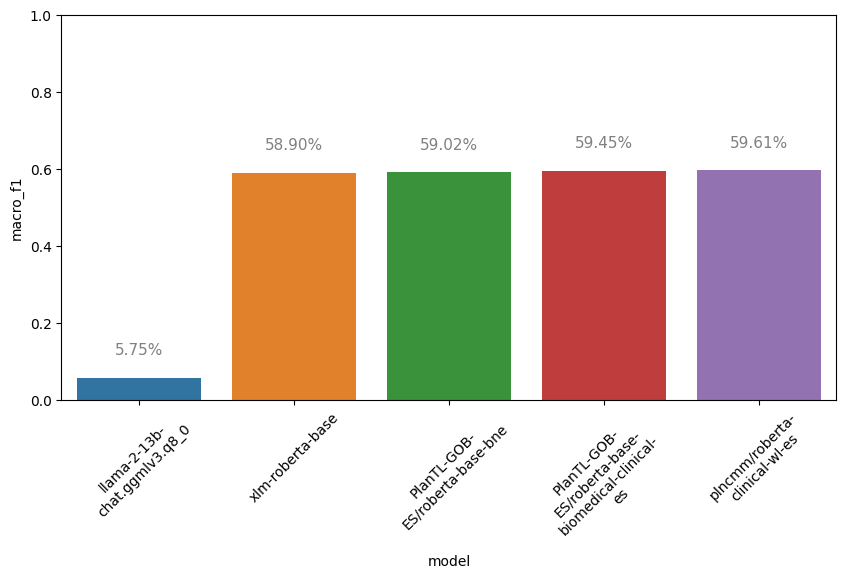

In [57]:
barplot(dataset="spanish_diagnostics", metric="macro_f1")